In [10]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [4]:
dataset = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss"

MSIMUT_train = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/train/MSIMUT"
MSS_train = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/train/MSS"

MSIMUT_test = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/test/MSIMUT"
MSS_test = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/test/MSS"


MSIMUT_val = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/val/MSIMUT"
MSS_val = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/val/MSS"


In [6]:
base_dir = "/kaggle/input/train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss"
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

In [8]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224) 


In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,       # Shuffle training data for better learning
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='int'    # Labels will be 0 or 1
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=False,      # No need to shuffle validation
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='int'
)

class_names = train_ds.class_names
print(f"\nClasses: {class_names}")

Found 153849 files belonging to 2 classes.


2026-02-12 18:15:35.894965: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 19230 files belonging to 2 classes.
Found 19233 files belonging to 2 classes.

Classes: ['MSIMUT', 'MSS']


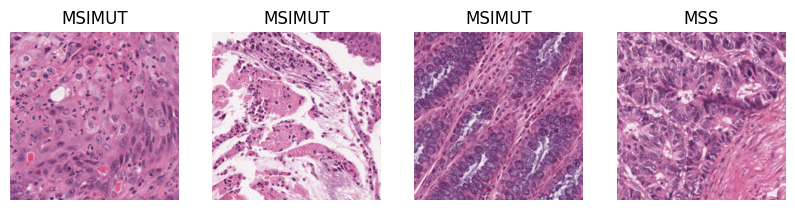

In [14]:
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1): # Take 1 batch
    for i in range(4): # Show first 4 images
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()